What Influences Developer Salaries in 2023?

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("stack_survey_trimmed.csv")

# Initial inspection
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [12]:
# Check missing data
missing = df.isnull().mean().sort_values(ascending=False)
missing[missing > 0.3]  # drop columns with too many nulls if needed

# Drop rows with critical info missing
df_clean = df.dropna(subset=["Country", "RemoteWork", "EdLevel", "ConvertedCompYearly"])

# Remove extreme outliers
df_clean = df_clean[df_clean["ConvertedCompYearly"] < 500000]


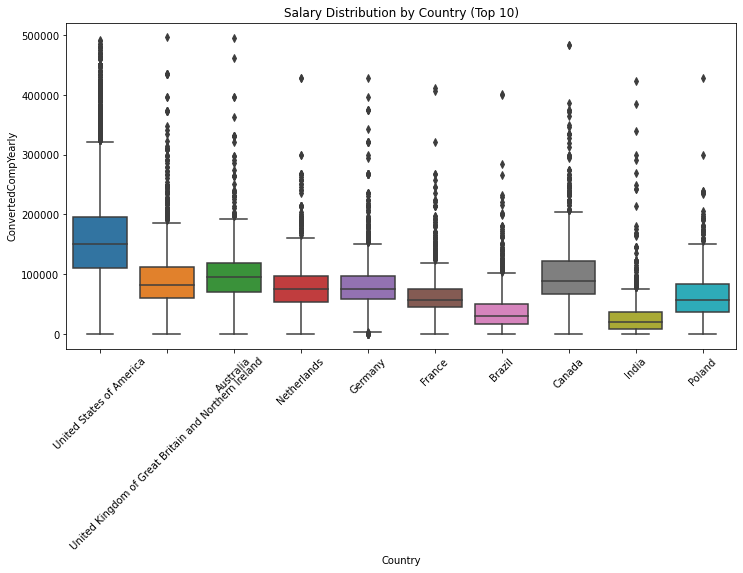

In [13]:
top_countries = df_clean["Country"].value_counts().head(10).index
df_top = df_clean[df_clean["Country"].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x="Country", y="ConvertedCompYearly")
plt.xticks(rotation=45)
plt.title("Salary Distribution by Country (Top 10)")
plt.show()


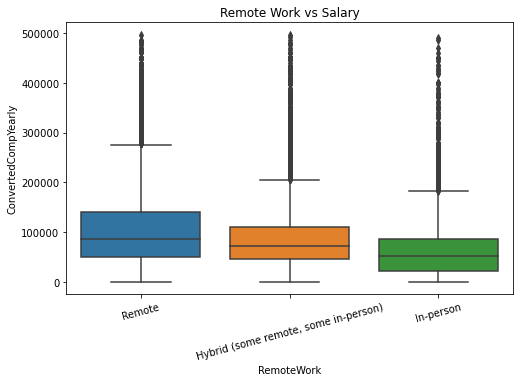

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x="RemoteWork", y="ConvertedCompYearly")
plt.xticks(rotation=15)
plt.title("Remote Work vs Salary")
plt.show()


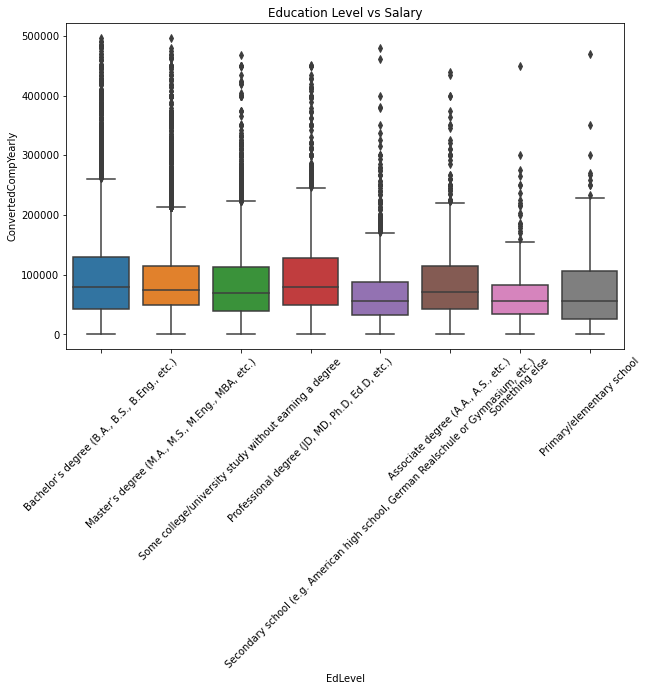

In [15]:
edu_order = df_clean["EdLevel"].value_counts().index
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x="EdLevel", y="ConvertedCompYearly", order=edu_order)
plt.xticks(rotation=45)
plt.title("Education Level vs Salary")
plt.show()


In [16]:
# Encode categorical variables
df_model = df_clean[["ConvertedCompYearly", "Country", "RemoteWork", "EdLevel"]]
df_model = pd.get_dummies(df_model, drop_first=True)

# Train/test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df_model.drop("ConvertedCompYearly", axis=1)
y = df_model["ConvertedCompYearly"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))


R^2 Score: -8.440200384421496e+17
